<a href="https://colab.research.google.com/github/Yash-Kamtekar/frequent-pattern-mining-apriori-and-fpgrowth/blob/main/Apriori_FP_Growth_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing necessary libraries

In [13]:
!pip install mlxtend --upgrade

###Importing necessary libraries

In [14]:
from google.colab import drive
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

mounting drive

In [15]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Load the data frame and change it to the necessary format

In [16]:
df = pd.read_csv('/content/drive/MyDrive/255/Assignment_5/groceries.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [17]:
df.product_name = ["".join(i.split(",")) for i in df.itemDescription]
member_labels = df.Member_number.unique()
transactions = [df[df.Member_number == i]["itemDescription"].tolist() for i in member_labels]
trans_encoder = TransactionEncoder().fit(transactions)
transactions = trans_encoder.transform(transactions)
transactions = pd.DataFrame(transactions,columns=trans_encoder.columns_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


###Calculate the frequent itemset using Apriori, also calculate the Association rules using Apriori.

In [18]:
apriori_frequent_itemset = apriori(transactions, min_support = 0.0045, use_colnames = True)
apriori_association_rules = association_rules(apriori_frequent_itemset, metric = "confidence")

###Association Rules generation using Apriori Method

In [19]:
print("Association Rules using Apriori Method:- \n")
for item in apriori_association_rules.iterrows():
  print(f"Rule {item[0] + 1}: {tuple(item[1].antecedents)} -> {tuple(item[1].consequents)}")

Association Rules using Apriori Method:- 

Rule 1: ('meat spreads',) -> ('whole milk',)
Rule 2: ('canned vegetables', 'bottled water') -> ('whole milk',)
Rule 3: ('white bread', 'chewing gum') -> ('whole milk',)
Rule 4: ('curd', 'ham') -> ('whole milk',)
Rule 5: ('frozen fish', 'shopping bags') -> ('whole milk',)
Rule 6: ('other vegetables', 'mayonnaise') -> ('whole milk',)
Rule 7: ('sausage', 'soft cheese') -> ('whole milk',)
Rule 8: ('beef', 'bottled beer', 'citrus fruit') -> ('whole milk',)
Rule 9: ('beef', 'bottled beer', 'root vegetables') -> ('whole milk',)
Rule 10: ('berries', 'bottled water', 'pip fruit') -> ('other vegetables',)
Rule 11: ('berries', 'pip fruit', 'yogurt') -> ('whole milk',)
Rule 12: ('berries', 'shopping bags', 'yogurt') -> ('whole milk',)
Rule 13: ('bottled beer', 'brown bread', 'shopping bags') -> ('whole milk',)
Rule 14: ('other vegetables', 'bottled beer', 'cat food') -> ('whole milk',)
Rule 15: ('margarine', 'newspapers', 'bottled water') -> ('whole milk'

###Visualization of support and confidence for Apriori

In [20]:
support_for_apriori = apriori_association_rules['support'].values
confidence_for_apriori = apriori_association_rules['confidence'].values

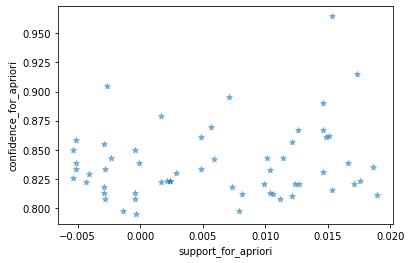

In [21]:
import random
import matplotlib.pyplot as plt


for i in range (len(support_for_apriori)):
   support_for_apriori[i] = support_for_apriori[i] + 0.0025 * (random.randint(1, 10) - 5)
   confidence_for_apriori[i] = confidence_for_apriori[i] + 0.0025 * (random.randint(1, 10) - 5)

plt.scatter(support_for_apriori, confidence_for_apriori, alpha = 0.5, marker = "*")
plt.xlabel('support_for_apriori')
plt.ylabel('confidence_for_apriori')
plt.show()

###Calculate the frequent itemset using FPGrowth, also calculate the Association rules using FPGrowth.

In [22]:
fpgrowth_frequent_itemset = fpgrowth(transactions, min_support = 0.0045, use_colnames=True)
fpgrowth_association_rules = association_rules(fpgrowth_frequent_itemset, metric = "confidence")

###Association Rules generation using FPGrowth Method

In [23]:
print("Association Rules using fpgrowth Method:- \n")
for item in fpgrowth_association_rules.iterrows():
  print(f"Rule {item[0] + 1}: {tuple(item[1].antecedents)} -> {tuple(item[1].consequents)}")

Association Rules using fpgrowth Method:- 

Rule 1: ('sugar', 'rolls/buns', 'root vegetables') -> ('whole milk',)
Rule 2: ('domestic eggs', 'other vegetables', 'meat') -> ('whole milk',)
Rule 3: ('other vegetables', 'meat', 'brown bread') -> ('whole milk',)
Rule 4: ('citrus fruit', 'candy', 'yogurt') -> ('whole milk',)
Rule 5: ('butter', 'whipped/sour cream', 'other vegetables', 'yogurt') -> ('whole milk',)
Rule 6: ('rolls/buns', 'other vegetables', 'coffee', 'sausage') -> ('whole milk',)
Rule 7: ('pastry', 'chocolate', 'yogurt') -> ('whole milk',)
Rule 8: ('pip fruit', 'other vegetables', 'yogurt', 'bottled water') -> ('whole milk',)
Rule 9: ('pip fruit', 'rolls/buns', 'yogurt', 'bottled water') -> ('whole milk',)
Rule 10: ('pip fruit', 'soda', 'yogurt', 'bottled water') -> ('whole milk',)
Rule 11: ('other vegetables', 'yogurt', 'frankfurter', 'bottled water') -> ('whole milk',)
Rule 12: ('yogurt', 'soda', 'pork', 'pip fruit') -> ('whole milk',)
Rule 13: ('rolls/buns', 'soda', 'pork',

###Visualization of support and confidence for FP Growth

In [24]:
support_for_fp = fpgrowth_association_rules['support'].values
confidence_for_fp = fpgrowth_association_rules['confidence'].values

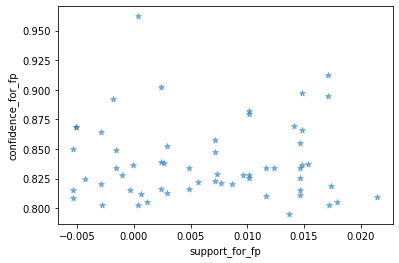

In [25]:
import random
import matplotlib.pyplot as plt


for i in range (len(support_for_fp)):
   support_for_fp[i] = support_for_fp[i] + 0.0025 * (random.randint(1,10) - 5)
   confidence_for_fp[i] = confidence_for_fp[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support_for_fp, confidence_for_fp,   alpha=0.5, marker="*")
plt.xlabel('support_for_fp')
plt.ylabel('confidence_for_fp')
plt.show()